# Over Dose Prevention

## Overview

## Business Probelm

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
od_data = pd.read_csv('Data/OD_Deaths.csv')
od_data.head()

,State,State Name,Year,Month,Indicator,Data Value,Predicted Value,Percent Complete,Percent Pending Investigation,Footnote
0,AK,AK,2015,January,Number of Deaths,4034.0,NaN,100,0.0,NaN
1,AK,AK,2015,February,Number of Deaths,4084.0,NaN,100,0.0,NaN
2,AK,AK,2015,March,Number of Deaths,4101.0,NaN,100,0.0,NaN
3,AK,AK,2015,April,Number of Deaths,4133.0,NaN,100,0.0,NaN
4,AK,AK,2015,May,Number of Deaths,4196.0,NaN,100,0.0,NaN


In [3]:
od_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10320 non-null  object 
 1   State Name                     10320 non-null  object 
 2   Year                           10320 non-null  int64  
 3   Month                          10320 non-null  object 
 4   Indicator                      10320 non-null  object 
 5   Data Value                     10320 non-null  float64
 6   Predicted Value                7440 non-null   float64
 7   Percent Complete               10320 non-null  int64  
 8   Percent Pending Investigation  10320 non-null  float64
 9   Footnote                       4128 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 806.4+ KB


In [4]:
od_data['Indicator'].value_counts()

Indicator
Number of Deaths                                 2120
Number of Drug Overdose Deaths                   2120
Cocaine (T40.5)                                   760
Heroin (T40.1)                                    760
Methadone (T40.3)                                 760
Natural & semi-synthetic opioids (T40.2)          760
Opioids (T40.0-T40.4,T40.6)                       760
Percent with drugs specified                      760
Psychostimulants with abuse potential (T43.6)     760
Synthetic opioids, excl. methadone (T40.4)        760
Name: count, dtype: int64

In [5]:
od_data[['Indicator', 'Predicted Value']].value_counts()

Indicator                                      Predicted Value
Methadone (T40.3)                              32.0               20
                                               39.0               19
                                               33.0               19
Psychostimulants with abuse potential (T43.6)  9.0                16
Cocaine (T40.5)                                54.0               16
                                                                  ..
Number of Drug Overdose Deaths                 854.0               1
                                               858.0               1
                                               862.0               1
                                               866.0               1
Synthetic opioids, excl. methadone (T40.4)     30545.0             1
Name: count, Length: 4045, dtype: int64

In [6]:
od_data['Predicted Value'].value_counts()

Predicted Value
32.0      47
39.0      40
49.0      39
33.0      38
40.0      37
          ..
673.0      1
1596.0     1
1613.0     1
1599.0     1
896.0      1
Name: count, Length: 2084, dtype: int64

In [7]:
od_data['Percent Complete'].value_counts()

Percent Complete
100    10320
Name: count, dtype: int64

In [8]:
od_data['Percent Pending Investigation'].value_counts()

Percent Pending Investigation
0.000000    1084
0.201884      20
0.028775      12
0.309033      10
0.408055      10
            ... 
0.023500       2
0.025135       2
0.017390       2
0.017569       2
0.021081       2
Name: count, Length: 1883, dtype: int64

In [9]:
od_data['Year'].value_counts()

Year
2015    3096
2016    3096
2017    3096
2018    1032
Name: count, dtype: int64

- 3.33 years of data?

In [10]:
od_data['Footnote'].value_counts()

Footnote
Underreported due to incomplete data                                                                                  4120
Jurisdiction-specific values not shown for 2018 due to incomplete cause of death reporting at the time of analysis       8
Name: count, dtype: int64

In [11]:
od_data['State'].value_counts()

State
YC    400
RI    400
NH    400
NM    400
NV    400
NY    400
ME    400
MD    400
OK    400
OR    400
SC    400
NC    400
WA    400
US    400
WV    400
UT    400
VA    400
VT    400
CT    400
WY     80
NJ     80
WI     80
TX     80
TN     80
PA     80
NE     80
SD     80
OH     80
AK     80
ND     80
AL     80
AR     80
AZ     80
CA     80
CO     80
DC     80
DE     80
FL     80
GA     80
HI     80
IA     80
ID     80
IL     80
IN     80
KS     80
KY     80
LA     80
MA     80
MI     80
MN     80
MO     80
MS     80
MT     80
Name: count, dtype: int64

In [12]:
od_data['State Name'].value_counts()

State Name
YC    400
RI    400
NH    400
NM    400
NV    400
NY    400
ME    400
MD    400
OK    400
OR    400
SC    400
NC    400
WA    400
US    400
WV    400
UT    400
VA    400
VT    400
CT    400
WY     80
NJ     80
WI     80
TX     80
TN     80
PA     80
NE     80
SD     80
OH     80
AK     80
ND     80
AL     80
AR     80
AZ     80
CA     80
CO     80
DC     80
DE     80
FL     80
GA     80
HI     80
IA     80
ID     80
IL     80
IN     80
KS     80
KY     80
LA     80
MA     80
MI     80
MN     80
MO     80
MS     80
MT     80
Name: count, dtype: int64

## Data Preparation

In [13]:
od_data['State'].value_counts()==od_data['State Name'].value_counts()

State
YC    True
RI    True
NH    True
NM    True
NV    True
NY    True
ME    True
MD    True
OK    True
OR    True
SC    True
NC    True
WA    True
US    True
WV    True
UT    True
VA    True
VT    True
CT    True
WY    True
NJ    True
WI    True
TX    True
TN    True
PA    True
NE    True
SD    True
OH    True
AK    True
ND    True
AL    True
AR    True
AZ    True
CA    True
CO    True
DC    True
DE    True
FL    True
GA    True
HI    True
IA    True
ID    True
IL    True
IN    True
KS    True
KY    True
LA    True
MA    True
MI    True
MN    True
MO    True
MS    True
MT    True
Name: count, dtype: bool

- The column 'Percent Complete'

- The column 'State Name'

- The column 'Predicted Value'

- The column 'Footnote'

In [14]:
od_data = od_data.drop(columns=['Percent Complete'], axis=1)

In [15]:
od_data = od_data.drop(columns=['State Name'], axis=1)

In [16]:
od_data = od_data.drop(columns=['Predicted Value'], axis=1)

In [17]:
od_data = od_data.drop(columns=['Footnote'], axis=1)

In [18]:
od_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10320 non-null  object 
 1   Year                           10320 non-null  int64  
 2   Month                          10320 non-null  object 
 3   Indicator                      10320 non-null  object 
 4   Data Value                     10320 non-null  float64
 5   Percent Pending Investigation  10320 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 483.9+ KB


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
od_data.head()

,State,Year,Month,Indicator,Data Value,Percent Pending Investigation
0,AK,2015,January,Number of Deaths,4034.0,0.0
1,AK,2015,February,Number of Deaths,4084.0,0.0
2,AK,2015,March,Number of Deaths,4101.0,0.0
3,AK,2015,April,Number of Deaths,4133.0,0.0
4,AK,2015,May,Number of Deaths,4196.0,0.0


In [21]:
od_data2 = od_data.copy()

In [22]:
od_data2['Date'] = od_data2['Month'] + " " + od_data2['Year'].astype(str)
od_data2.head()

,State,Year,Month,Indicator,Data Value,Percent Pending Investigation,Date
0,AK,2015,January,Number of Deaths,4034.0,0.0,January 2015
1,AK,2015,February,Number of Deaths,4084.0,0.0,February 2015
2,AK,2015,March,Number of Deaths,4101.0,0.0,March 2015
3,AK,2015,April,Number of Deaths,4133.0,0.0,April 2015
4,AK,2015,May,Number of Deaths,4196.0,0.0,May 2015


In [23]:
od_data2['Date'] = pd.to_datetime(od_data2['Date'])
od_data2.head()

/var/folders/hy/h0vms2gd2kdd6x049jm1j1p80000gn/T/ipykernel_55907/3767003321.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  od_data2['Date'] = pd.to_datetime(od_data2['Date'])


,State,Year,Month,Indicator,Data Value,Percent Pending Investigation,Date
0,AK,2015,January,Number of Deaths,4034.0,0.0,2015-01-01
1,AK,2015,February,Number of Deaths,4084.0,0.0,2015-02-01
2,AK,2015,March,Number of Deaths,4101.0,0.0,2015-03-01
3,AK,2015,April,Number of Deaths,4133.0,0.0,2015-04-01
4,AK,2015,May,Number of Deaths,4196.0,0.0,2015-05-01


In [24]:
od_data2 = od_data2.drop(columns=['Year', 'Month'], axis=1)

In [25]:
od_data2.set_index('Date', inplace=True)

In [26]:
od_data2.head()

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0
2015-03-01,AK,Number of Deaths,4101.0,0.0
2015-04-01,AK,Number of Deaths,4133.0,0.0
2015-05-01,AK,Number of Deaths,4196.0,0.0


### Creat two Dataframes that have 'Number of Deaths' and 'Number of Drug Overdose Deaths' separate. 

In [27]:
od_df = od_data2[(od_data2['Indicator'] == 'Number of Deaths') | (od_data2['Indicator'] == 'Number of Drug Overdose Deaths')]
od_df.info()                                                                 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4240 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          4240 non-null   object 
 1   Indicator                      4240 non-null   object 
 2   Data Value                     4240 non-null   float64
 3   Percent Pending Investigation  4240 non-null   float64
dtypes: float64(2), object(2)
memory usage: 165.6+ KB


In [28]:
# Groupby way of splitting data
#grouped = od_data2.groupby(['State', 'Indicator'])
#od_df = grouped.get_group(('NY', 'Number of Deaths'&'Number of Overdose Deaths'))

In [29]:
od_df.head()

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0
2015-03-01,AK,Number of Deaths,4101.0,0.0
2015-04-01,AK,Number of Deaths,4133.0,0.0
2015-05-01,AK,Number of Deaths,4196.0,0.0


In [30]:
deaths_df = od_df[od_df['Indicator'] == 'Number of Deaths']

In [31]:
deaths_df.head(2)

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0


In [32]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          2120 non-null   object 
 1   Indicator                      2120 non-null   object 
 2   Data Value                     2120 non-null   float64
 3   Percent Pending Investigation  2120 non-null   float64
dtypes: float64(2), object(2)
memory usage: 82.8+ KB


In [33]:
overdose_df = od_df[od_df['Indicator'] == 'Number of Drug Overdose Deaths']

In [34]:
overdose_df.head(2)

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Drug Overdose Deaths,126.0,0.0
2015-02-01,AK,Number of Drug Overdose Deaths,127.0,0.0


## Combo dataframe of total deths and drug deaths

In [35]:
combo_df = pd.merge(deaths_df, overdose_df, on=['Date', 'State']) 

In [36]:
combo_df.head(2)

,State,Indicator_x,Data Value_x,Percent Pending Investigation_x,Indicator_y,Data Value_y,Percent Pending Investigation_y
Date,,,,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0,Number of Drug Overdose Deaths,126.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0,Number of Drug Overdose Deaths,127.0,0.0


In [37]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Indicator_x                      2120 non-null   object 
 2   Data Value_x                     2120 non-null   float64
 3   Percent Pending Investigation_x  2120 non-null   float64
 4   Indicator_y                      2120 non-null   object 
 5   Data Value_y                     2120 non-null   float64
 6   Percent Pending Investigation_y  2120 non-null   float64
dtypes: float64(4), object(3)
memory usage: 132.5+ KB


In [38]:
combo_df = combo_df.drop(columns='Percent Pending Investigation_y', axis=1)

In [39]:
combo_df['Data Value_x'] = combo_df['Data Value_x'].astype(int)

In [40]:
combo_df['Data Value_y'] = combo_df['Data Value_y'].astype(int)

In [41]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Indicator_x                      2120 non-null   object 
 2   Data Value_x                     2120 non-null   int64  
 3   Percent Pending Investigation_x  2120 non-null   float64
 4   Indicator_y                      2120 non-null   object 
 5   Data Value_y                     2120 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 115.9+ KB


In [42]:
# Create copy of this df incase i need the columns to be somewhat original before these next changes
combos_df = combo_df.copy()

In [43]:
combo_df = combo_df.rename(columns={'Data Value_x': "Total Deaths", 'Data Value_y': "Overdose Deaths"})

In [44]:
combo_df = combo_df.drop(columns=['Indicator_x','Indicator_y'], axis=1)

In [45]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Total Deaths                     2120 non-null   int64  
 2   Percent Pending Investigation_x  2120 non-null   float64
 3   Overdose Deaths                  2120 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 82.8+ KB


In [46]:
combo_df['OD Percentage of Total Deaths'] = ((combo_df["Overdose Deaths"] / combo_df["Total Deaths"]).replace(np.nan, 0) * 100).round(1)

In [47]:
combo_df.head()

,State,Total Deaths,Percent Pending Investigation_x,Overdose Deaths,OD Percentage of Total Deaths
Date,,,,,
2015-01-01,AK,4034,0.0,126,3.1
2015-02-01,AK,4084,0.0,127,3.1
2015-03-01,AK,4101,0.0,125,3.0
2015-04-01,AK,4133,0.0,126,3.0
2015-05-01,AK,4196,0.0,125,3.0


In [48]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Total Deaths                     2120 non-null   int64  
 2   Percent Pending Investigation_x  2120 non-null   float64
 3   Overdose Deaths                  2120 non-null   int64  
 4   OD Percentage of Total Deaths    2120 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 99.4+ KB


## Specific Drug OD dataframe

In [49]:
od_drugs = od_data2.copy()

In [50]:
od_drugs = od_data2[(od_data2['Indicator'] != 'Number of Deaths') & (od_data2['Indicator'] != 'Number of Drug Overdose Deaths')]
od_drugs.info()                                                                 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          6080 non-null   object 
 1   Indicator                      6080 non-null   object 
 2   Data Value                     6080 non-null   float64
 3   Percent Pending Investigation  6080 non-null   float64
dtypes: float64(2), object(2)
memory usage: 237.5+ KB


In [51]:
od_drugs = od_drugs.rename(columns={'Data Value': "Total Deaths"})

In [52]:
od_drugs['Indicator'].value_counts()

Indicator
Cocaine (T40.5)                                  760
Heroin (T40.1)                                   760
Methadone (T40.3)                                760
Natural & semi-synthetic opioids (T40.2)         760
Opioids (T40.0-T40.4,T40.6)                      760
Percent with drugs specified                     760
Psychostimulants with abuse potential (T43.6)    760
Synthetic opioids, excl. methadone (T40.4)       760
Name: count, dtype: int64

In [53]:
od_drugs.head()

,State,Indicator,Total Deaths,Percent Pending Investigation
Date,,,,
2015-01-01,CT,Cocaine (T40.5),118.0,0.009927
2015-02-01,CT,Cocaine (T40.5),124.0,0.009885
2015-03-01,CT,Cocaine (T40.5),124.0,0.009837
2015-04-01,CT,Cocaine (T40.5),125.0,0.009858
2015-05-01,CT,Cocaine (T40.5),124.0,0.013142


## Visualizations

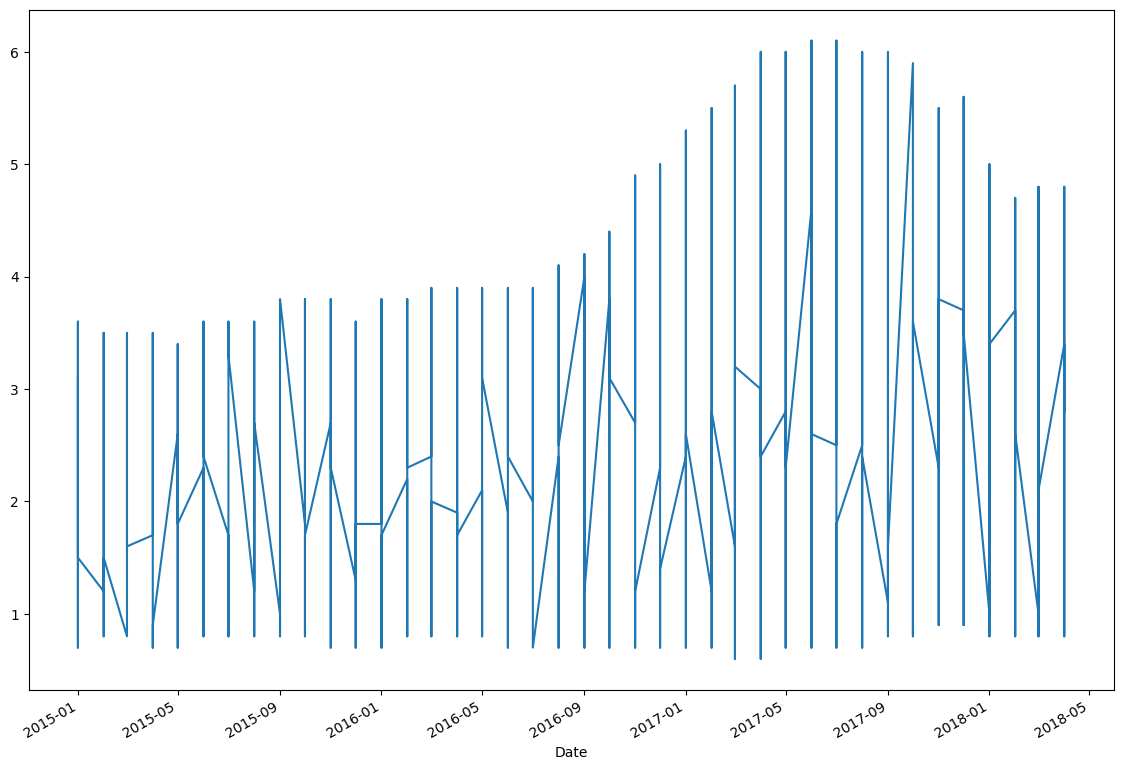

In [54]:
combo_df['OD Percentage of Total Deaths'].plot(figsize = (14,10))
plt.show();

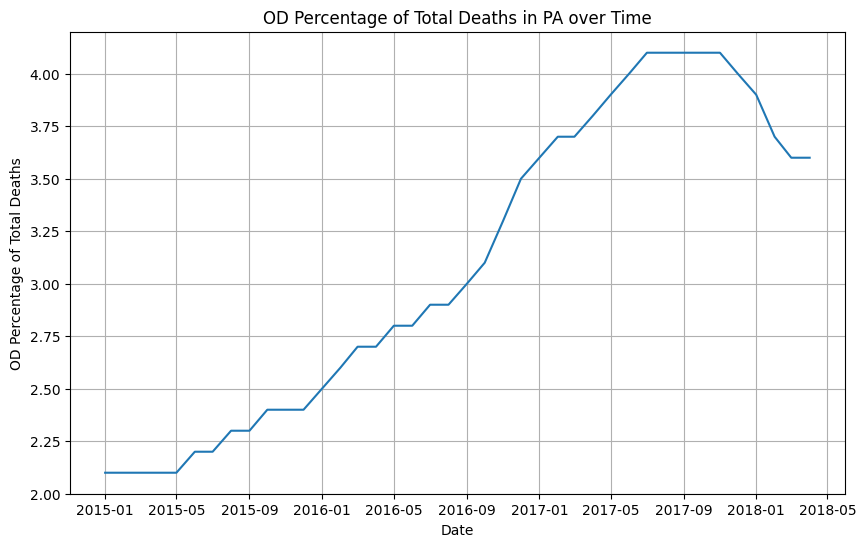

In [55]:
# Filter data for 'PA' state
pa_df = combo_df[combo_df['State'] == 'PA']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(pa_df.index, pa_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in PA over Time')
plt.grid(True)
plt.show()

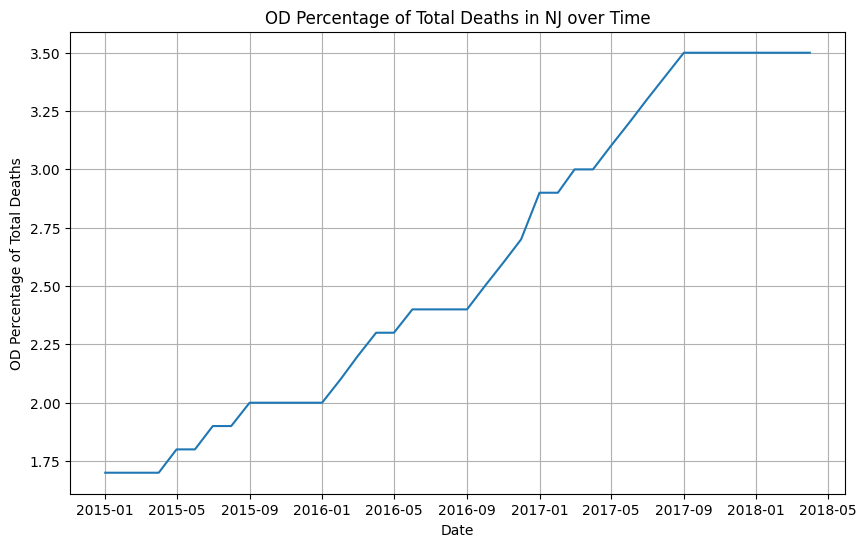

In [56]:
# Filter data for 'NJ' state
nj_df = combo_df[combo_df['State'] == 'NJ']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(nj_df.index, nj_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in NJ over Time')
plt.grid(True)
plt.show()

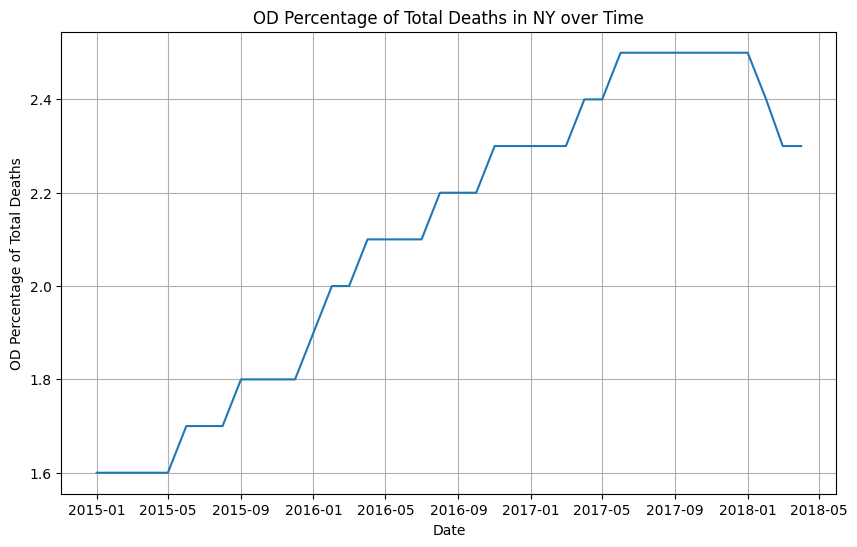

In [57]:
# Filter data for 'NY' state
ny_df = combo_df[combo_df['State'] == 'NY']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(ny_df.index, ny_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in NY over Time')
plt.grid(True)
plt.show()

## I have no idea what 'State' or territory is represented by 'US' and 'YC'

In [58]:
# Find top 5 values in 'OD Percentage of Total Deaths' column
top_5_values = combo_df.nlargest(5, 'OD Percentage of Total Deaths')

# Display the top 5 values
print(top_5_values)

           State  Total Deaths  Percent Pending Investigation_x   
Date                                                              
2017-06-01    DC          6328                         0.000000  \
2017-07-01    DC          6314                         0.000000   
2017-04-01    DC          6241                         0.000000   
2017-05-01    DC          6287                         0.000000   
2017-08-01    DC          6296                         0.015883   

            Overdose Deaths  OD Percentage of Total Deaths  
Date                                                        
2017-06-01              384                            6.1  
2017-07-01              383                            6.1  
2017-04-01              375                            6.0  
2017-05-01              380                            6.0  
2017-08-01              377                            6.0  


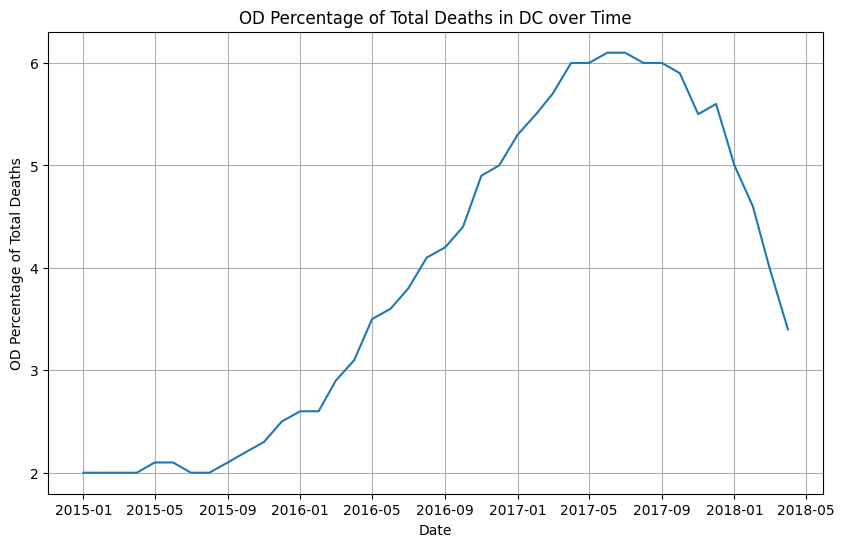

In [59]:
# Filter data for 'DC' state
dc_df = combo_df[combo_df['State'] == 'DC']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(dc_df.index, dc_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in DC over Time')
plt.grid(True)
plt.show()

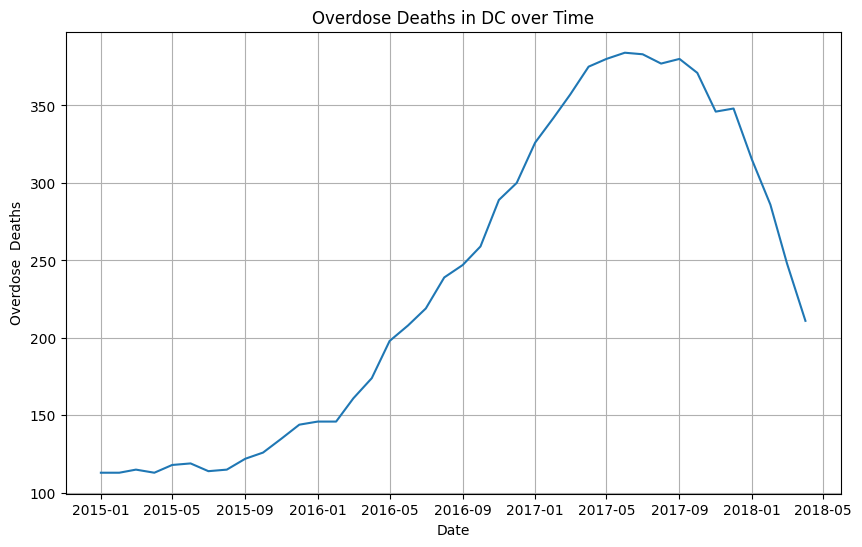

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(dc_df.index, dc_df['Overdose Deaths'])
plt.xlabel('Date')
plt.ylabel('Overdose  Deaths')
plt.title('Overdose Deaths in DC over Time')
plt.grid(True)
plt.show()

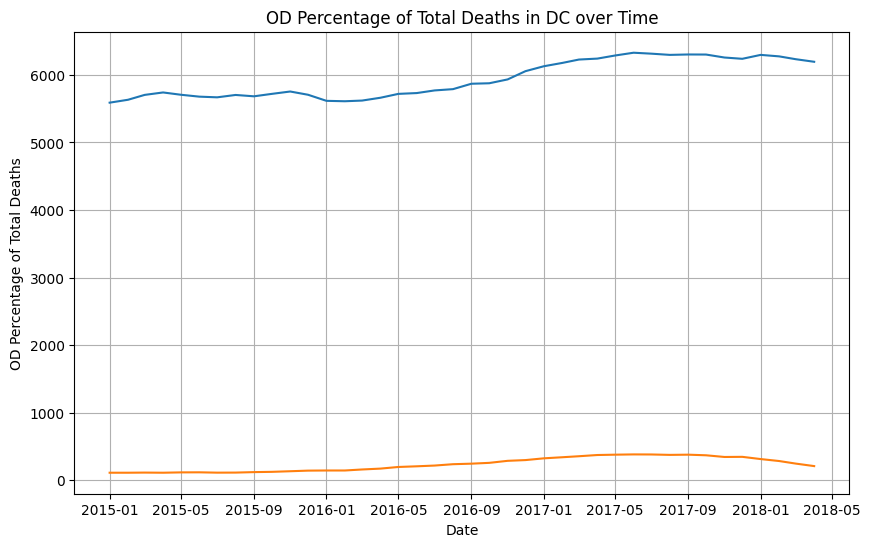

In [61]:
# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(dc_df.index, dc_df['Total Deaths'], dc_df['Overdose Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in DC over Time')
plt.grid(True)
plt.show()

In [63]:
#combo_df.corr()

In [64]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Total Deaths                     2120 non-null   int64  
 2   Percent Pending Investigation_x  2120 non-null   float64
 3   Overdose Deaths                  2120 non-null   int64  
 4   OD Percentage of Total Deaths    2120 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 99.4+ KB


In [65]:
USA_df = combo_df[combo_df['State'] == 'US']
USA_df.head()

,State,Total Deaths,Percent Pending Investigation_x,Overdose Deaths,OD Percentage of Total Deaths
Date,,,,,
2015-01-01,US,2653334,0.143178,47523,1.8
2015-02-01,US,2668442,0.146003,47725,1.8
2015-03-01,US,2682744,0.145001,48198,1.8
2015-04-01,US,2691628,0.146454,48748,1.8
2015-05-01,US,2698421,0.146197,49293,1.8


In [66]:
# Filter the dataframe to include only the data within the specified time period
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-06-01')
filtered_df = combo_df[(combo_df.index >= start_date) & (combo_df.index <= end_date)]

# Group the filtered dataframe by state and calculate the average 'OD Percentage of Total Deaths'
grouped_df = filtered_df.groupby('State').mean()

# Sort the grouped dataframe by average 'OD Percentage of Total Deaths' in descending order
sorted_df = grouped_df.sort_values(by='OD Percentage of Total Deaths', ascending=False)

# Get the top 7 states with the highest average 'OD Percentage of Total Deaths'
top_7_states = sorted_df.head(7)

# Get the highest mean 'OD Percentage of Total Deaths' for each of the top 7 states
highest_means = top_7_states['OD Percentage of Total Deaths']

# Print the highest 7 means of 'OD Percentage of Total Deaths' for seven different states
print("The highest 7 means of 'OD Percentage of Total Deaths' for seven different states from 2017-01-01 to 2018-06-01 are:")
print(highest_means.to_string())

The highest 7 means of 'OD Percentage of Total Deaths' for seven different states from 2017-01-01 to 2018-06-01 are:
State
DC    5.41875
MD    4.59375
WV    4.28125
OH    4.02500
PA    3.87500
NH    3.77500
MA    3.64375


In [67]:
highest_means = highest_means.to_frame()

In [68]:
highest_means.head()

,OD Percentage of Total Deaths
State,
DC,5.41875
MD,4.59375
WV,4.28125
OH,4.02500
PA,3.87500


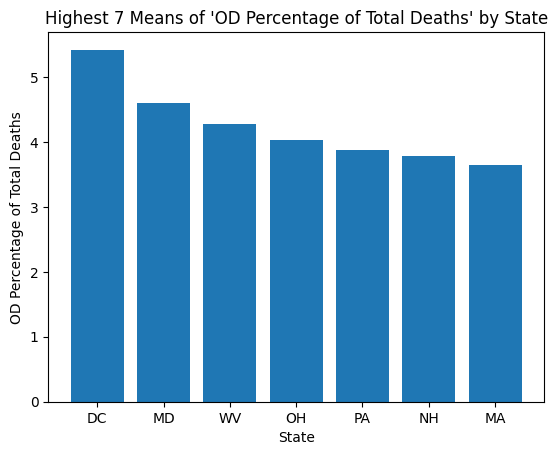

In [69]:
# Visualization of the top seven states average mean of OD % of total deaths.
# Create the bar graph
plt.bar(highest_means.index, highest_means['OD Percentage of Total Deaths'])

# Set the title and labels
plt.title("Highest 7 Means of 'OD Percentage of Total Deaths' by State")
plt.xlabel('State')
plt.ylabel('OD Percentage of Total Deaths')

# Show the plot
plt.show()

## Models

In [70]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [71]:
combo_df.head(2)

,State,Total Deaths,Percent Pending Investigation_x,Overdose Deaths,OD Percentage of Total Deaths
Date,,,,,
2015-01-01,AK,4034,0.0,126,3.1
2015-02-01,AK,4084,0.0,127,3.1


/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


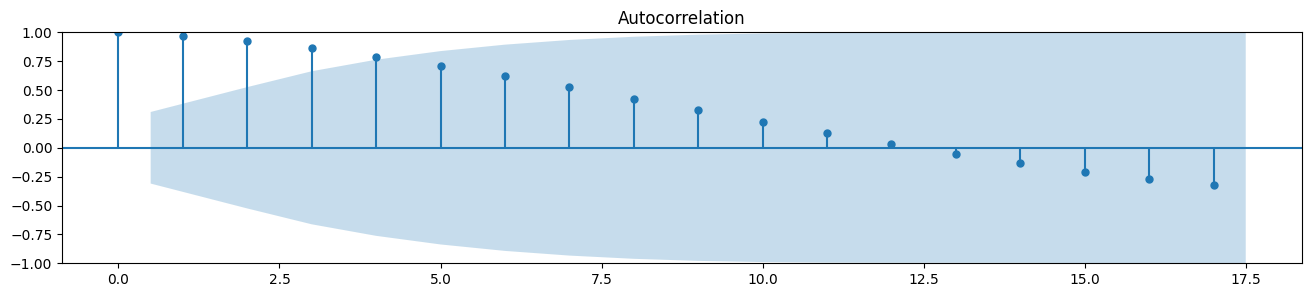

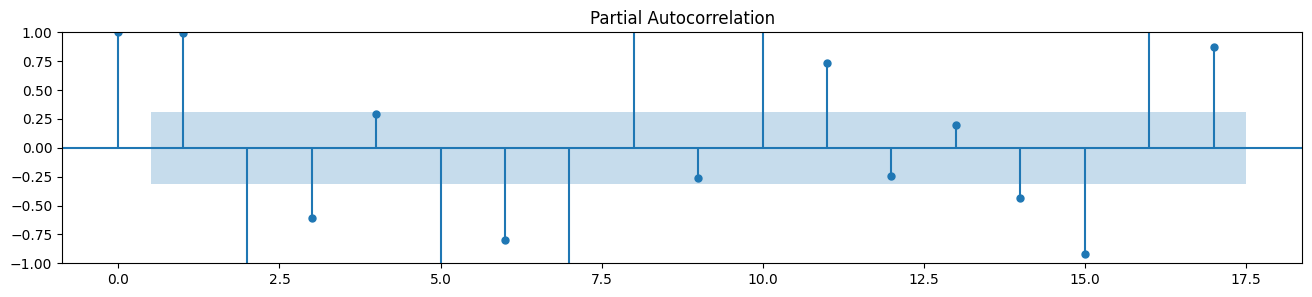

In [72]:
# ACF and PACF plots for 'DC'
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

dc_df = combo_df[combo_df['State'] == 'DC']

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(dc_df['Overdose Deaths'], ax=ax);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(dc_df['Overdose Deaths'], ax=ax);

In [73]:
#Looking at the stats of just 'DC'

train = dc_df.iloc[:30]
test = dc_df.iloc[30:]

model = ARIMA(train['Overdose Deaths'], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit)

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive

In [74]:
#model_fit.predict()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Overdose Deaths   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -120.999
Date:                Mon, 17 Apr 2023   AIC                            247.998
Time:                        10:36:32   BIC                            252.202
Sample:                    01-01-2015   HQIC                           249.343
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.5602    128.265      1.922      0.055      -4.834     497.954
ar.L1          0.9954      0.034     28.852      0.000       0.928       1.063
sigma2       159.5667     44.030      3.624      0.000      73.269     245.865
===================================================================================
Ljung-Box (L1) (Q):                   7.13   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.01   Prob(JB):                         0.86
Heteroskedasticity (H):              10.22   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

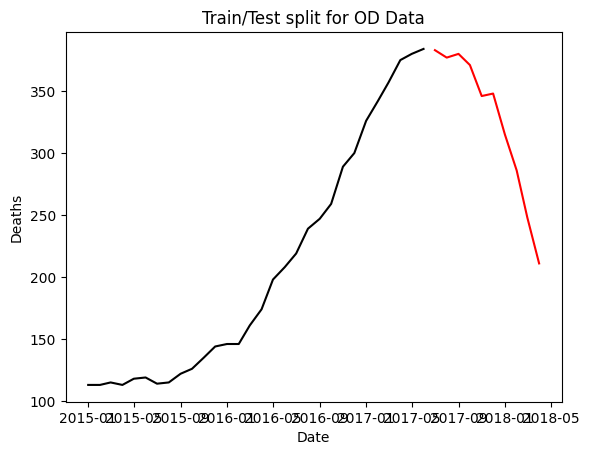

In [76]:
plt.plot(train['Overdose Deaths'], color = "black")
plt.plot(test['Overdose Deaths'], color = "red")
plt.ylabel('Deaths')
plt.xlabel('Date')
plt.title("Train/Test split for OD Data")
plt.show()

In [77]:
output = model_fit.forecast()

In [78]:
print(output)

2017-07-01    383.366726
Freq: MS, dtype: float64


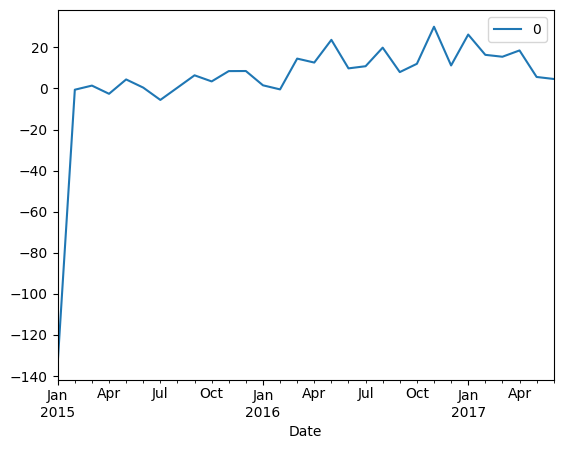

In [79]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

predicted=391.806889, expected=383.000000
predicted=382.823588, expected=377.000000
predicted=375.860032, expected=380.000000
predicted=378.468644, expected=371.000000
predicted=367.871131, expected=346.000000
predicted=334.903700, expected=348.000000
predicted=336.113011, expected=315.000000
predicted=300.181930, expected=286.000000
predicted=273.511065, expected=248.000000
predicted=206.892732, expected=211.000000
Test RMSE: 14.659


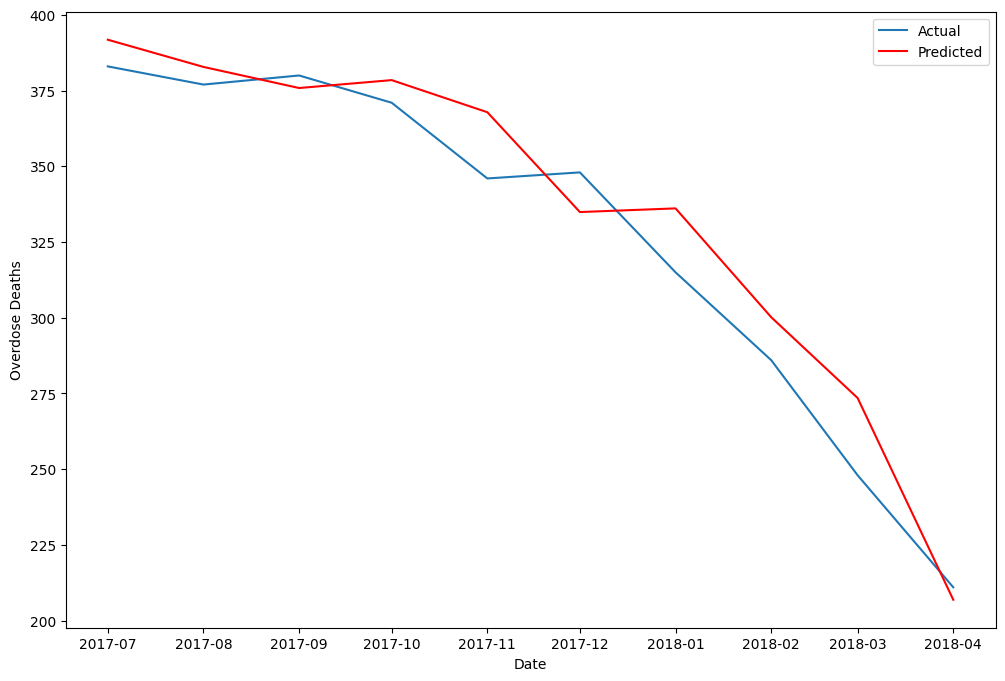

In [80]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 8)) 

predictions = []

# Create a history list to keep track of the training data
history = train['Overdose Deaths'].tolist()

# Walk-forward validation
for t in range(len(test)):
    # Fit the ARIMA model to the history data
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast the next value
    output = model_fit.forecast()
    yhat = output[0]
    
    # Append the predicted value to the list of predictions
    predictions.append(yhat)
    
    # Get the observed value from the test set
    obs = test['Overdose Deaths'].iloc[t]
    
    # Append the observed value to the history for the next iteration
    history.append(obs)
    
    # Print the predicted and expected values
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate the forecasts
rmse = sqrt(mean_squared_error(test['Overdose Deaths'], predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test.index, test['Overdose Deaths'])
plt.plot(test.index, predictions, color='red')
plt.xlabel('Date')
plt.ylabel('Overdose Deaths')
plt.legend(['Actual', 'Predicted'])
plt.show()

## USA

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


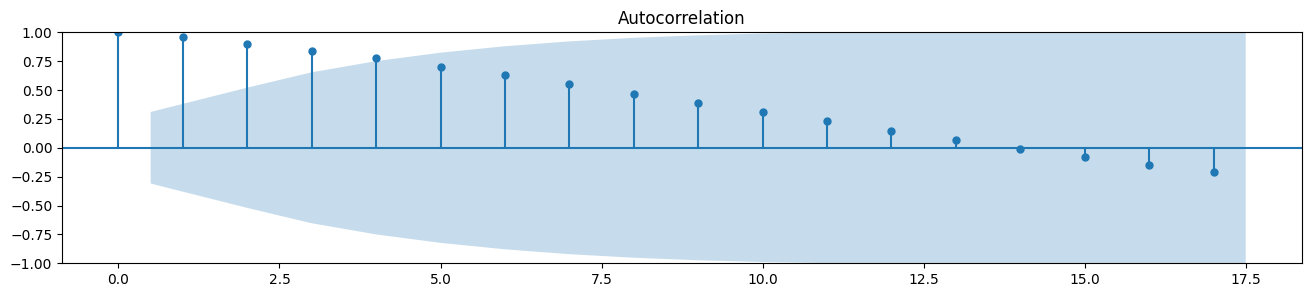

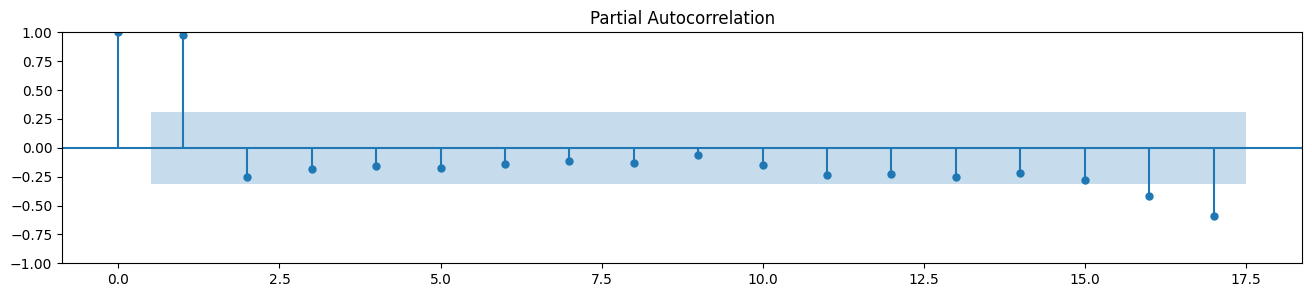

In [81]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

USA_df = combo_df[combo_df['State'] == 'US']

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(USA_df['Overdose Deaths'], ax=ax);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(USA_df['Overdose Deaths'], ax=ax);

In [135]:
#Train test split using nationwide totals as a whole
train_usa = USA_df['Overdose Deaths'].iloc[:30]#.diff().dropna()
test_usa = USA_df['Overdose Deaths'].iloc[30:]#.diff().dropna()

model_usa = ARIMA(train_usa, order=(1, 1, 0))
model_fit_usa = model_usa.fit()
print(model_fit_usa)

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [150]:
# Apply log transformation to the training data
train_usa_log = np.log(train_usa)
train_usa_log_diff = train_usa_log.diff().dropna()

# Fit ARIMA model to the log-transformed data
model_usa_log = ARIMA(train_usa_log_diff, order=(1, 0, 1))
model_fit_usa_log = model_usa_log.fit()

# Print model summary
print(model_fit_usa_log.summary())

                               SARIMAX Results                                
Dep. Variable:        Overdose Deaths   No. Observations:                   29
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 116.631
Date:                Mon, 17 Apr 2023   AIC                           -225.262
Time:                        13:05:56   BIC                           -219.793
Sample:                    02-01-2015   HQIC                          -223.549
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.002      7.097      0.000       0.009       0.016
ar.L1          0.4606      0.359      1.283      0.199      -0.243       1.164
ma.L1          0.2271      0.541      0.419      0.6

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [151]:
# Apply log transformation to the training data
train_usa_log = np.log(train_usa)
train_usa_log_diff = train_usa_log.diff().dropna()

# Fit ARIMA model to the log-transformed data
model_usa_log = ARIMA(train_usa_log_diff, order=(4, 0, 2))
model_fit_usa_log = model_usa_log.fit()

# Print model summary
print(model_fit_usa_log.summary())

                               SARIMAX Results                                
Dep. Variable:        Overdose Deaths   No. Observations:                   29
Model:                 ARIMA(4, 0, 2)   Log Likelihood                 120.365
Date:                Mon, 17 Apr 2023   AIC                           -224.730
Time:                        13:07:23   BIC                           -213.792
Sample:                    02-01-2015   HQIC                          -221.305
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0122      0.002      5.451      0.000       0.008       0.017
ar.L1          0.7630      0.409      1.865      0.062      -0.039       1.565
ar.L2         -0.7524      0.560     -1.343      0.1

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [144]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_usa_log_diff)
result

(-2.9227153939419335,
 0.04276955508252469,
 1,
 27,
 {'1%': -3.6996079738860943,
  '5%': -2.9764303469999494,
  '10%': -2.627601001371742},
 -146.8201217808273)

<Axes: xlabel='Date'>

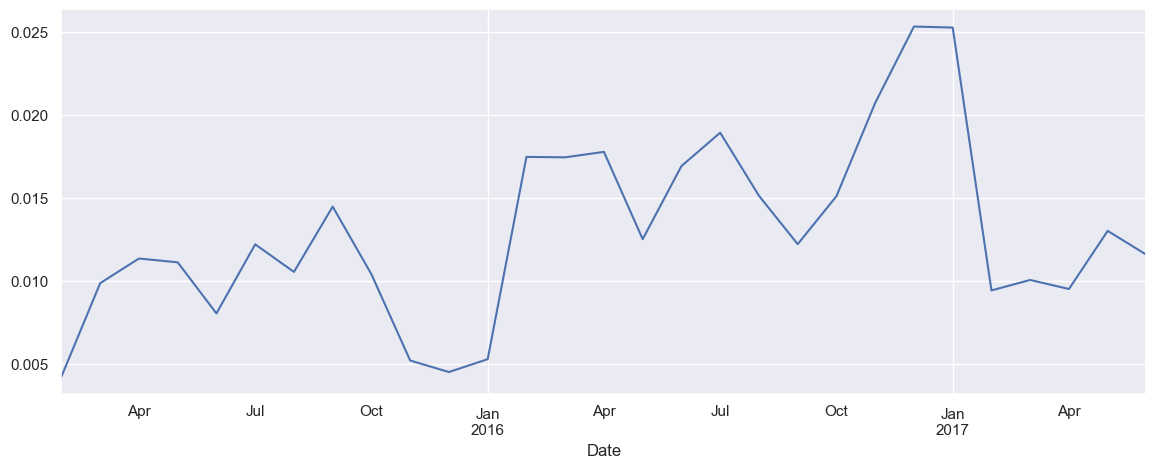

In [149]:
train_usa_log_diff.plot()

In [125]:
train_usa

Date
2015-02-01     202.0
2015-03-01     473.0
2015-04-01     550.0
2015-05-01     545.0
2015-06-01     398.0
2015-07-01     610.0
2015-08-01     533.0
2015-09-01     741.0
2015-10-01     539.0
2015-11-01     272.0
2015-12-01     237.0
2016-01-01     279.0
2016-02-01     932.0
2016-03-01     947.0
2016-04-01     982.0
2016-05-01     702.0
2016-06-01     963.0
2016-07-01    1097.0
2016-08-01     892.0
2016-09-01     730.0
2016-10-01     915.0
2016-11-01    1278.0
2016-12-01    1598.0
2017-01-01    1635.0
2017-02-01     621.0
2017-03-01     669.0
2017-04-01     639.0
2017-05-01     884.0
2017-06-01     796.0
Name: Overdose Deaths, dtype: float64

In [83]:
model_fit_usa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Overdose Deaths   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -246.599
Date:                Mon, 17 Apr 2023   AIC                            499.198
Time:                        10:40:06   BIC                            503.401
Sample:                    01-01-2015   HQIC                           500.543
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.671e+04    2.1e+04      2.707      0.007    1.56e+04    9.78e+04
ar.L1          0.9970      0.033     30.390      0.000       0.933       1.061
sigma2      6.813e+05   3.15e+05      2.164      0.030    6.42e+04     1.3e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.50   Jarque-Bera (JB):                 6.86
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               3.99   Skew:                            -0.48
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

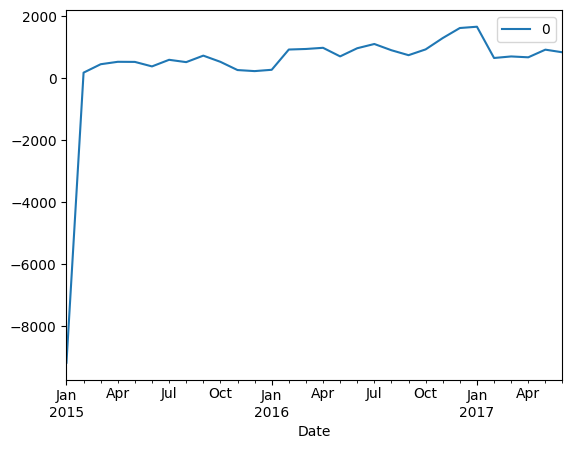

In [84]:
residuals_usa = pd.DataFrame(model_fit_usa.resid)
residuals_usa.plot()
plt.show()

predicted=69235.043541, expected=69551.000000
predicted=69576.911937, expected=70058.000000
predicted=70094.939386, expected=70694.000000
predicted=70741.883191, expected=70815.000000
predicted=70824.547650, expected=70877.000000
predicted=70882.116571, expected=70908.000000
predicted=70910.675565, expected=70174.000000
predicted=70111.121299, expected=69604.000000
predicted=69553.050380, expected=68924.000000
predicted=68861.460568, expected=68255.000000
Test RMSE: 475.634


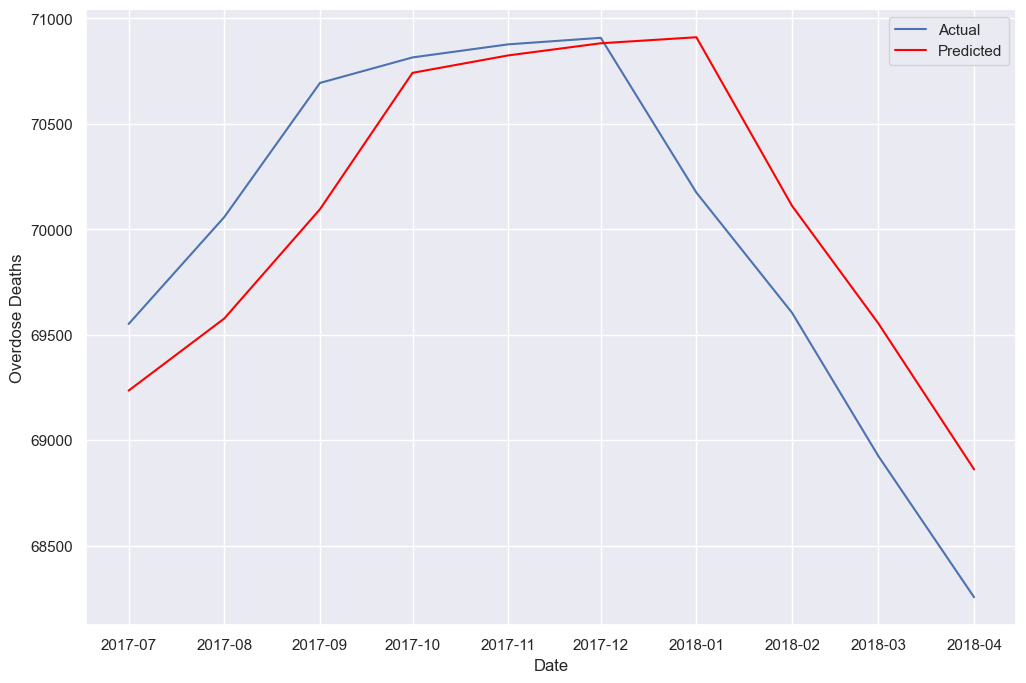

In [136]:
fig = plt.figure(figsize=(12, 8)) 

predictions_usa = []

# Create a history list to keep track of the training data
history_usa = train_usa.tolist() 


# Walk-forward validation
for t in range(len(test_usa)):
    # Fit the ARIMA model to the history data
    model_usa = ARIMA(history_usa, order=(1,1,0))
    model_fit_usa = model_usa.fit()
    
    # Forecast the next value
    output_usa = model_fit_usa.forecast()
    yhat_usa = output_usa[0]
    
    # Append the predicted value to the list of predictions
    predictions_usa.append(yhat_usa)
    
    # Get the observed value from the test set
    obs_usa = test_usa.iloc[t]
    
    # Append the observed value to the history for the next iteration
    history_usa.append(obs_usa)
    
    # Print the predicted and expected values
    print('predicted=%f, expected=%f' % (yhat_usa, obs_usa))

# Evaluate the forecasts
rmse_usa = sqrt(mean_squared_error(test_usa, predictions_usa))
print('Test RMSE: %.3f' % rmse_usa)

# Plot forecasts against actual outcomes
plt.plot(test_usa.index, test_usa)
plt.plot(test_usa.index, predictions_usa, color='red')
plt.xlabel('Date')
plt.ylabel('Overdose Deaths')
plt.legend(['Actual', 'Predicted'])
plt.show()

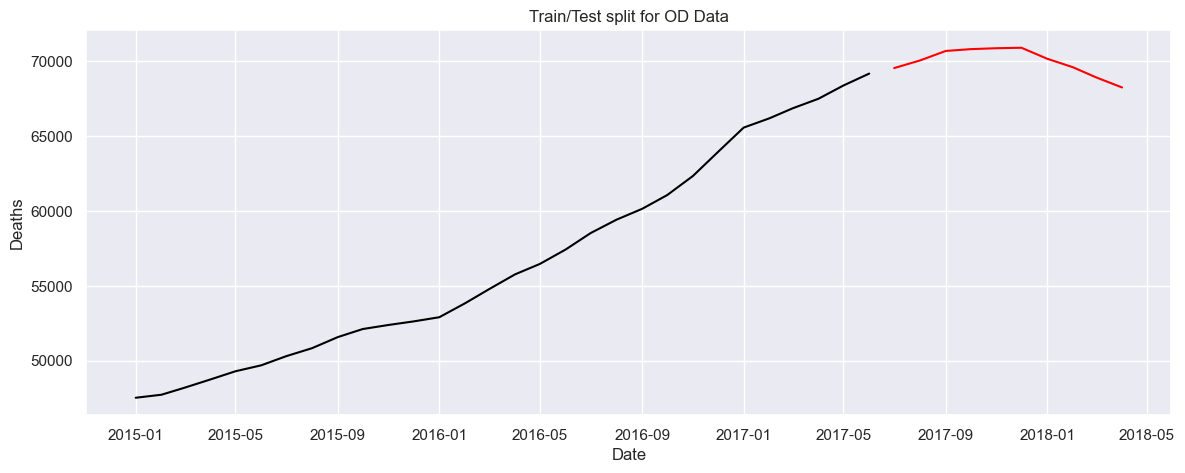

In [137]:
plt.plot(train_usa, color = "black")
plt.plot(test_usa, color = "red")
plt.ylabel('Deaths')
plt.xlabel('Date')
plt.title("Train/Test split for OD Data")
plt.show()

In [117]:
model_usa2 = ARIMA(train_usa['Overdose Deaths'], order=(2, 0, 0))
model_fit_usa2 = model_usa2.fit()
print(model_fit_usa2)
model_fit_usa2.summary()

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Overdose Deaths   No. Observations:                   30
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -216.214
Date:                Mon, 17 Apr 2023   AIC                            440.429
Time:                        11:00:52   BIC                            446.034
Sample:                    01-01-2015   HQIC                           442.222
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.671e+04   9817.796      5.776      0.000    3.75e+04     7.6e+04
ar.L1          1.9267      0.076     25.399      0.000       1.778       2.075
ar.L2         -0.9325      0.081    -11.494      0.000      -1.092      -0.774
sigma2      7.845e+04   2.03e+04      3.859      0.000    3.86e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.31
Prob(Q):                              0.96   Prob(JB):                         0.01
Heteroskedasticity (H):               5.05   Skew:                            -0.81
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
model_usa3 = ARIMA(train_usa['Overdose Deaths'], order=(4, 5, 0))
model_fit_usa3 = model_usa3.fit()
print(model_fit_usa3)
model_fit_usa3.summary()

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Overdose Deaths   No. Observations:                   30
Model:                 ARIMA(4, 5, 0)   Log Likelihood                -197.394
Date:                Mon, 17 Apr 2023   AIC                            404.789
Time:                        11:00:54   BIC                            410.883
Sample:                    01-01-2015   HQIC                           406.479
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3025      0.422     -3.088      0.002      -2.129      -0.476
ar.L2         -0.9258      0.412     -2.245      0.025      -1.734      -0.117
ar.L3         -0.5666      0.261     -2.167      0.030      -1.079      -0.054
ar.L4         -0.1826      0.079     -2.304      0.021      -0.338      -0.027
sigma2      3.921e+05   1.27e+05      3.096      0.002    1.44e+05     6.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                 7.52
Prob(Q):                              0.35   Prob(JB):                         0.02
Heteroskedasticity (H):               2.99   Skew:                             0.96
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
model_fit.predict()

array([  0.        , 113.0437049 , 113.00654824, 115.87586894,
       113.124913  , 119.54683251, 120.97797804, 114.90622222,
       111.49436173, 122.59728809, 133.3726252 , 143.44126481,
       151.85301954, 153.31511358, 147.25744326, 163.68365164,
       186.124306  , 219.79008466, 225.91665731, 232.10332038,
       247.906122  , 260.15161337, 270.99369643, 302.94401978,
       321.51048866, 348.49202493, 356.83053905, 374.89630772,
       387.25092092, 390.26384591, 388.68686053, 379.7528017 ,
       372.22796617, 375.52330054, 367.11973363, 334.35595239,
       330.58778221, 297.24623473, 265.03461964])

## More models

In [89]:
us_df = USA_df.copy()
us_df = us_df.drop(columns=['Percent Pending Investigation_x', 'State'], axis=1)

In [90]:
us_diff = us_df.diff(periods=1)

In [91]:
us_df.corr()

,Total Deaths,Overdose Deaths,OD Percentage of Total Deaths
Total Deaths,1.000000,0.912337,0.867994
Overdose Deaths,0.912337,1.000000,0.991308
OD Percentage of Total Deaths,0.867994,0.991308,1.000000


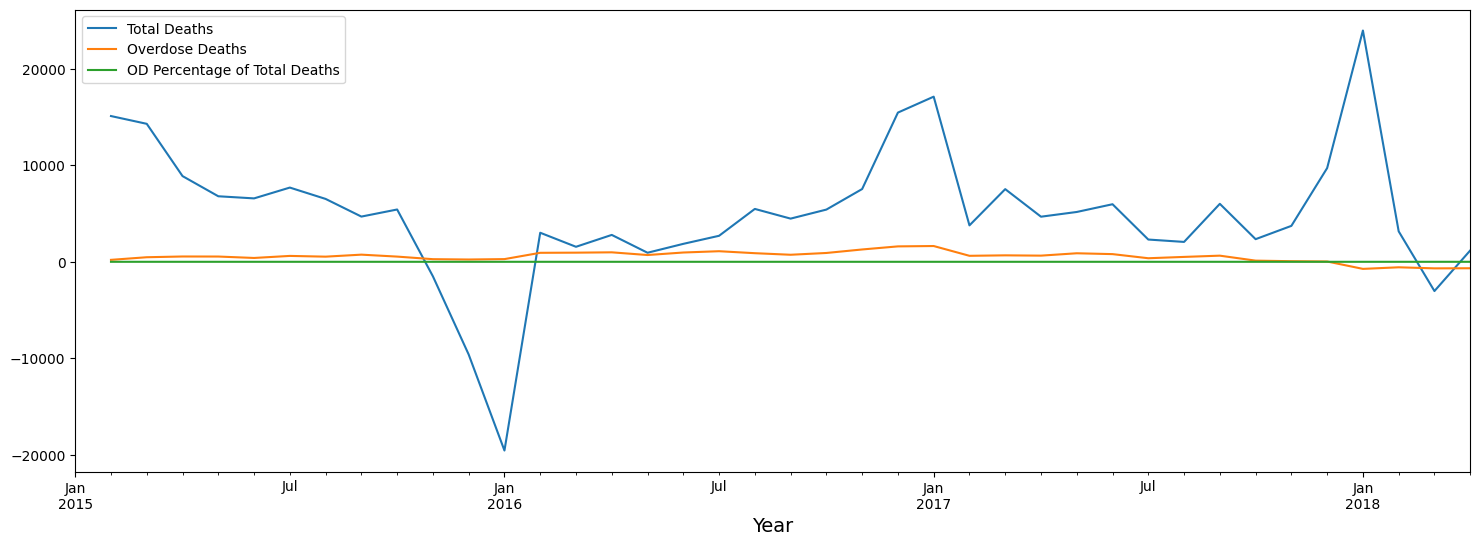

In [92]:
us_diff.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

In [93]:
us_diff.corr()

,Total Deaths,Overdose Deaths,OD Percentage of Total Deaths
Total Deaths,1.000000,0.145038,-0.080210
Overdose Deaths,0.145038,1.000000,0.462912
OD Percentage of Total Deaths,-0.080210,0.462912,1.000000


In [94]:
usa = us_df[['Overdose Deaths']]

In [95]:
usa_shift_1 = usa.shift(periods=1)
usa_shift_1.head()

,Overdose Deaths
Date,
2015-01-01,NaN
2015-02-01,47523.0
2015-03-01,47725.0
2015-04-01,48198.0
2015-05-01,48748.0


In [96]:
lag_1 = pd.concat([usa_shift_1, usa], axis=1)

lag_1.corr()

,Overdose Deaths,Overdose Deaths
Overdose Deaths,1.000000,0.997982
Overdose Deaths,0.997982,1.000000


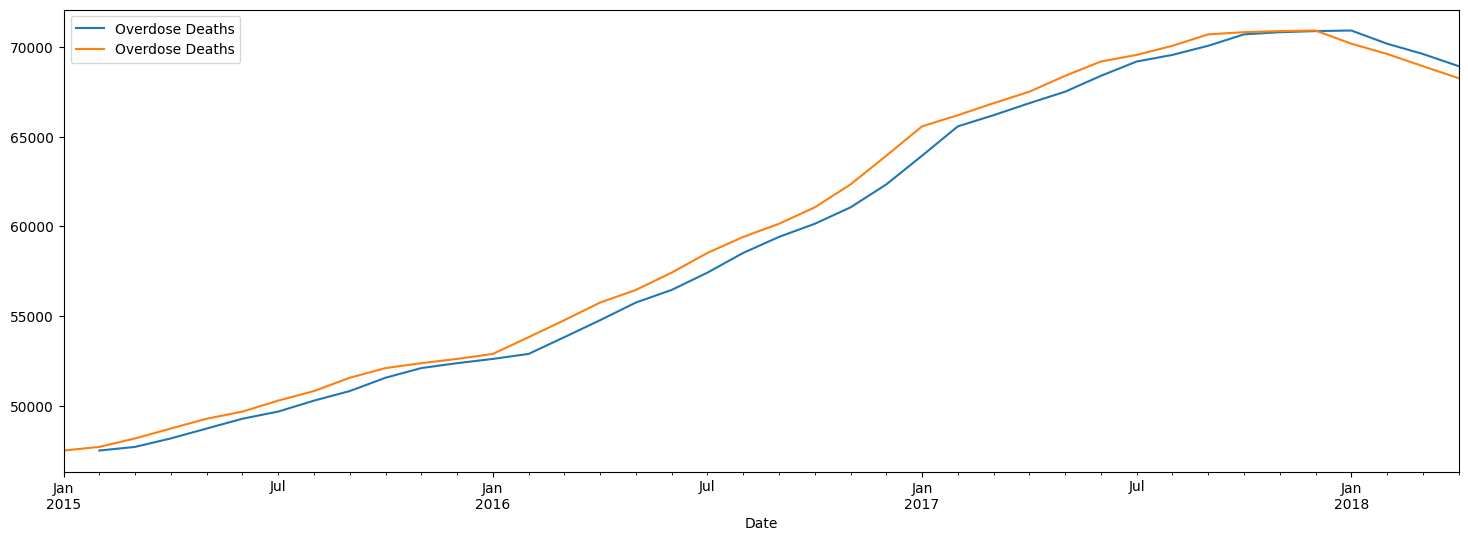

In [97]:
lag_1.plot(figsize=(18,6));

In [98]:
usa_shift_2 = usa.shift(periods=2)

lag_2 = pd.concat([usa_shift_2, usa], axis=1)

lag_2.corr()

,Overdose Deaths,Overdose Deaths
Overdose Deaths,1.000000,0.992793
Overdose Deaths,0.992793,1.000000


In [99]:
usa_shift_6 = usa.shift(periods=6)

lag_6 = pd.concat([usa_shift_6, usa], axis=1)

lag_6.corr()

,Overdose Deaths,Overdose Deaths
Overdose Deaths,1.000000,0.955936
Overdose Deaths,0.955936,1.000000


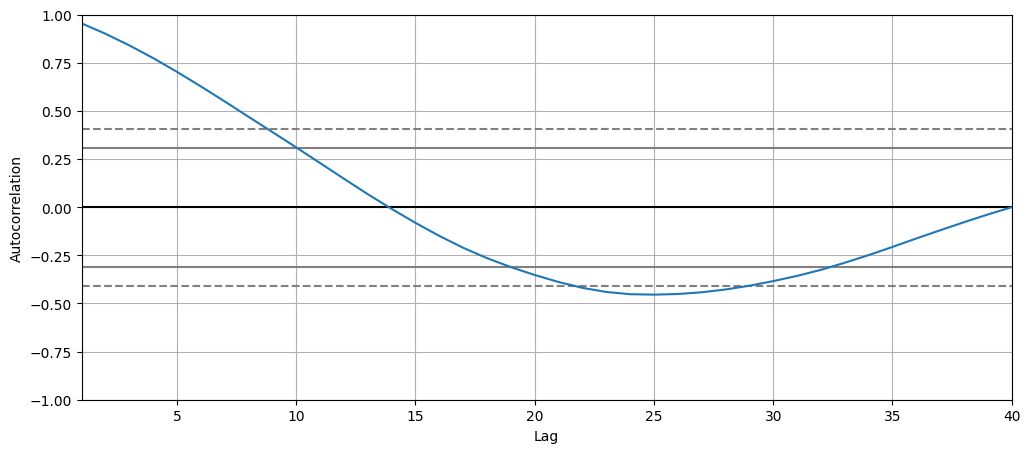

In [100]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(usa);

In [101]:
usa_diff = us_diff[['Overdose Deaths']].dropna()

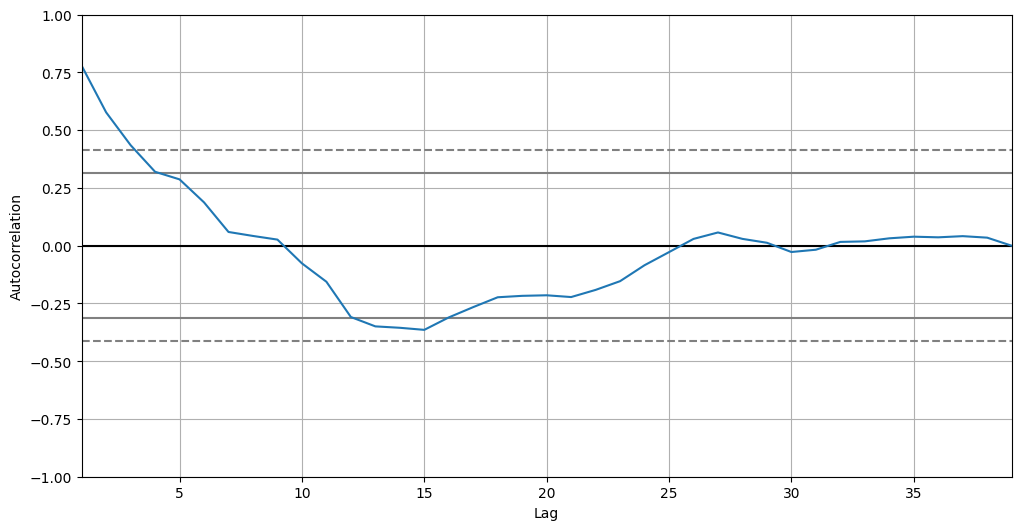

In [102]:
plt.figure(figsize=(12,6))
pd.plotting.autocorrelation_plot(usa_diff);

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


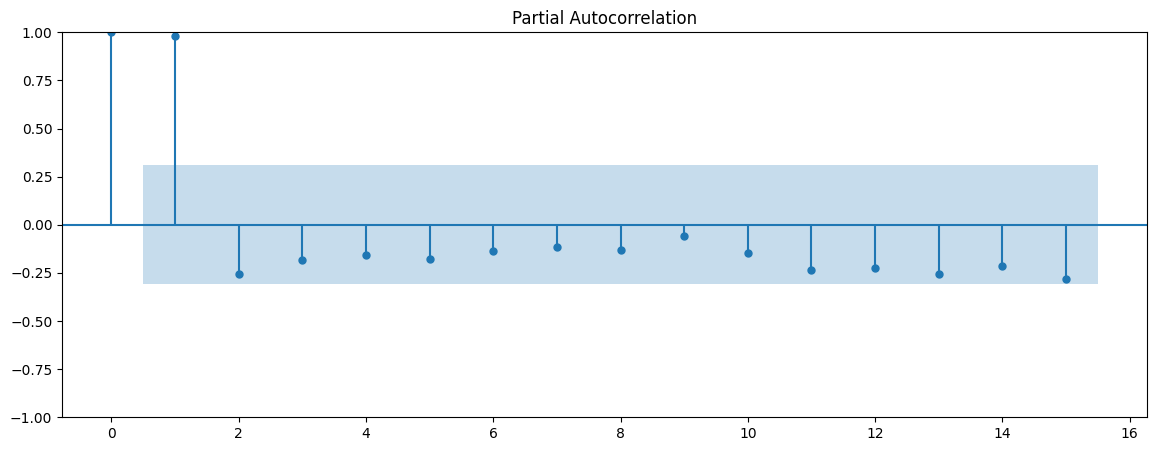

In [103]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(usa, lags=15);

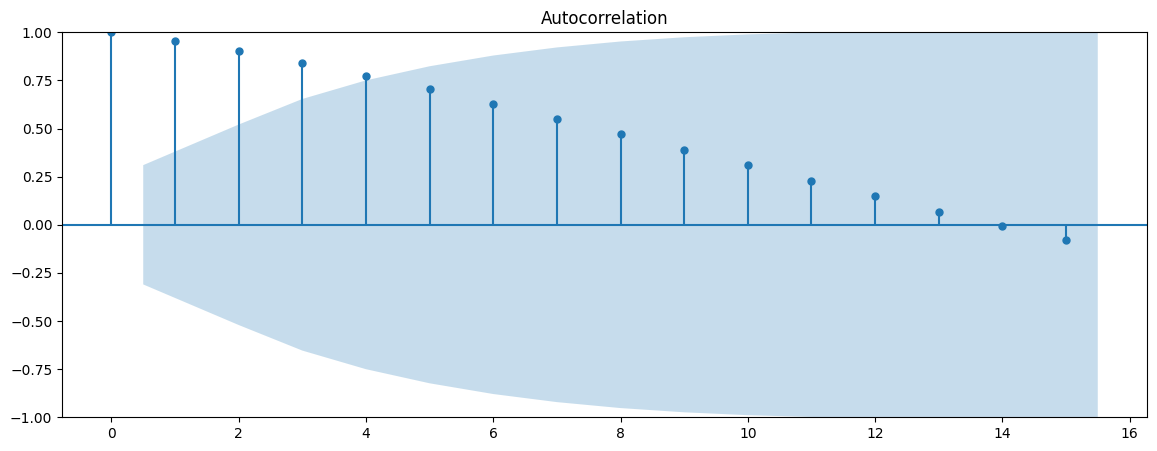

In [104]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(usa, lags=15);

## Another Method

In [105]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2015-01-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Overdose Deaths  40 non-null     int64
dtypes: int64(1)
memory usage: 640.0 bytes


In [106]:
import seaborn as sns
rolling_mean = usa.rolling(7).mean()
rolling_std = usa.rolling(7).std()

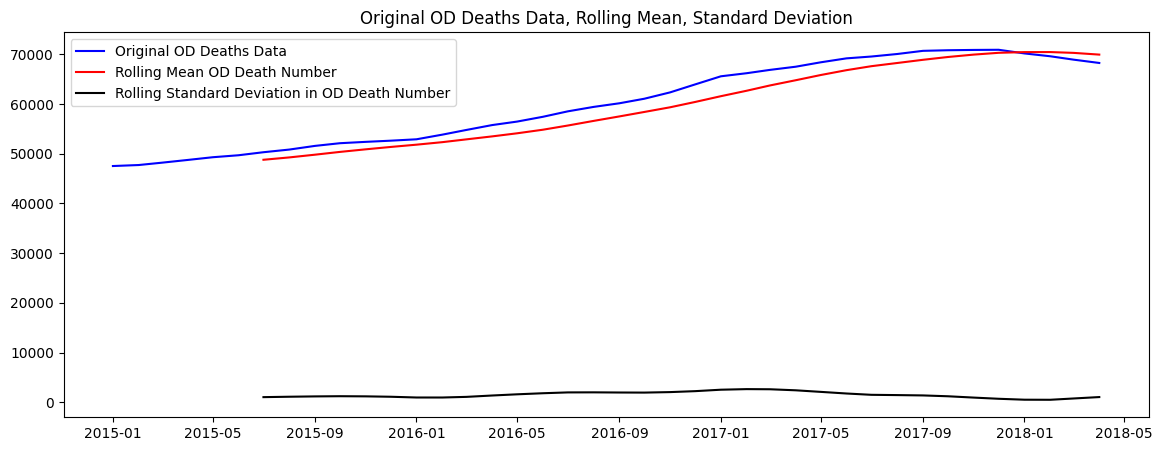

In [107]:
#plot this data overlapping
plt.plot(usa, color="blue",label="Original OD Deaths Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean OD Death Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in OD Death Number")
plt.title("Original OD Deaths Data, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [ ]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(usa,autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
adft = adfuller(usa,autolag="AIC")

In [110]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -1.978607              Test Statistics
1   0.296031                      p-value
2   1.000000             No. of lags used
3  38.000000  Number of observations used
4  -3.615509          critical value (1%)
5  -2.941262          critical value (5%)
6  -2.609200         critical value (10%)


In [111]:
#Autocorrelation
autocorrelation_lag1 = usa['Overdose Deaths'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9979817162614825


In [112]:
#Three, Six, and Nine month lags.
autocorrelation_lag3 = usa['Overdose Deaths'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = usa['Overdose Deaths'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = usa['Overdose Deaths'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.9853478217016953
Six Month Lag:  0.9559361352112811
Nine Month Lag:  0.9175930715843255


## Decomposition

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose

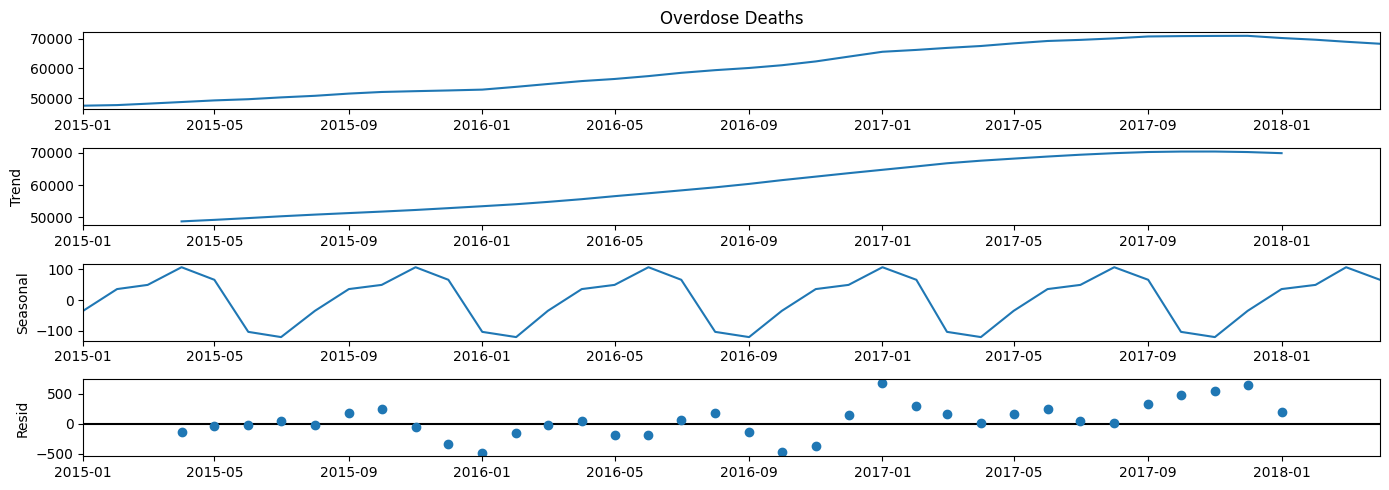

In [114]:
decompose = seasonal_decompose(usa['Overdose Deaths'],model='additive', period=7)
decompose.plot()
plt.show()

## Forecasting

/var/folders/hy/h0vms2gd2kdd6x049jm1j1p80000gn/T/ipykernel_55907/3564771721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['Date'] = usa.index
/var/folders/hy/h0vms2gd2kdd6x049jm1j1p80000gn/T/ipykernel_55907/3564771721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_us['train'] = train_us['Overdose Deaths']
/var/folders/hy/h0vms2gd2kdd6x049jm1j1p80000gn/T/ipykernel_55907/3564771721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

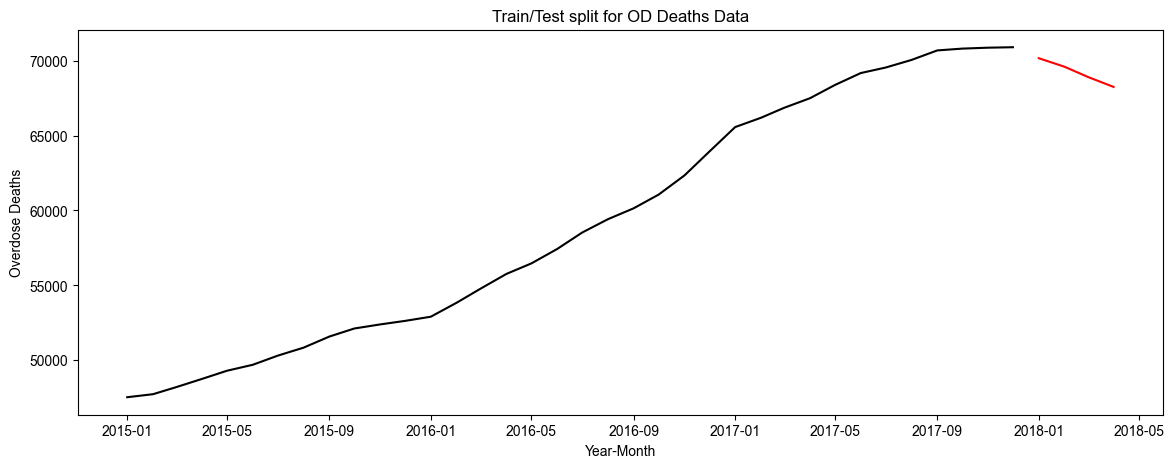

In [115]:
usa['Date'] = usa.index
train_us = usa[usa['Date'] < pd.to_datetime("2018-01", format='%Y-%m')]
train_us['train'] = train_us['Overdose Deaths']
del train_us['Date']
del train_us['Overdose Deaths']
test_us = usa[usa['Date'] >= pd.to_datetime("2018-01", format='%Y-%m')]
del test_us['Date']
test_us['test'] = test_us['Overdose Deaths']
del test_us['Overdose Deaths']
plt.plot(train_us, color = "black")
plt.plot(test_us, color = "red")
plt.title("Train/Test split for OD Deaths Data")
plt.ylabel("Overdose Deaths")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [ ]:
test_us.info()

from pmdarima.arima import auto_arima
model4 = auto_arima(train_us, trace=True, error_action='ignore', suppress_warnings=True)
model4.fit(train_us)
forecast4 = model4.predict(n_periods=len(test))
forecast4 = pd.DataFrame(forecast4,index = test_us.index,columns=['Prediction'])

from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model4 = ARIMA(train_us, order=(4, 2, 1))  # replace p, d, q with appropriate values
model4_fit = model4.fit()

# Make predictions for the test set
forecast4 = model4_fit.predict(n_periods=len(test_us))

# Compare the predictions to the actual values
print(forecast4)
print(test_us)

import pmdarima as pm

# Fit auto ARIMA model
model4 = pm.auto_arima(train_us, trace=True, error_action='ignore', suppress_warnings=True)
model4.fit(train_us)
forecast4 = model4.predict(n_periods=len(test_us))
forecast4 = pd.DataFrame(forecast4, index=test_us.index, columns=['Prediction'])

## Conclusion

## Extra Stuff

In [ ]:
## Compute autocorrelation and partial autocorrelation for 'Total Deaths' in combo_df
#value_combo_df = combo_df['Total Deaths'] # Extract 'Total Deaths' values for autocorrelation analysis
#acf_combo_df = sm.tsa.stattools.acf(value_combo_df, nlags=20)
#pacf_combo_df = sm.tsa.stattools.pacf(value_combo_df, nlags=20)


## Perform Ljung-Box test for autocorrelation on combo_df
#lb_test_stat_combo_df, lb_p_value_combo_df = acorr_ljungbox(value_combo_df, lags=20)
#print("Ljung-Box Test Statistic (combo_df):", lb_test_stat_combo_df)
#print("Ljung-Box Test p-value (combo_df):", lb_p_value_combo_df)

## Perform Durbin-Watson test for partial autocorrelation on combo_df
#dw_test_stat_combo_df, dw_p_value_combo_df = durbin_watson(value_combo_df)
#print("Durbin-Watson Test Statistic (combo_df):", dw_test_stat_combo_df)
#print("Durbin-Watson Test p-value (combo_df):", dw_p_value_combo_df)



In [ ]:
#combo_df = combo_df.sort_index(ascending=True)

In [ ]:
## Plot ACF and PACF for Total Deaths in combo_df
#plot_acf(combo_df['Total Deaths'])
#plt.title('Autocorrelation Function (ACF) for Total Deaths')
#plt.show()

#plot_pacf(combo_df['Total Deaths'])
#plt.title('Partial Autocorrelation Function (PACF) for Total Deaths')
#plt.show()

## Plot ACF and PACF for Deaths in od_drugs with Indicator 'Cocaine (T40.5)'
#plot_acf(od_drugs[od_drugs['Indicator'] == 'Cocaine (T40.5)']['Total Deaths'])
#plt.title('Autocorrelation Function (ACF) for Deaths with Indicator Cocaine (T40.5)')
#plt.show()

#plot_pacf(od_drugs[od_drugs['Indicator'] == 'Cocaine (T40.5)']['Total Deaths'])
#plt.title('Partial Autocorrelation Function (PACF) for Deaths with Indicator Cocaine (T40.5)')
#plt.show()

In [ ]:
## Create and fit ARIMA model using the chosen parameters
#model = ARIMA(combo_df['Total Deaths'], order=(1, 0, 0))
#model_fit = model.fit()
#print(model_fit)

In [ ]:
# Generate predictions for the future
future_steps = 12 # number of future steps to forecast
forecast_12 = model_fit_usa_log2.forecast(steps=future_steps)[0]

# Print the forecasted values
print("Forecasted values: ", forecast_12)

In [ ]:
# Forecast for the rest of 2018
start_date = '2018-05-01'
end_date = '2018-12-01'
forecast_2018 = model_fit_usa_log2.get_prediction(start=start_date, end=end_date, dynamic=False)

# Forecast for 2019
start_date = '2019-01-01'
end_date = '2019-12-01'
forecast_2019 = model_fit_usa_log2.get_prediction(start=start_date, end=end_date, dynamic=False)


# Plot the 2018 forecast
ax = train_usa.plot(label='Training Data')
forecast_2018.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_2018.conf_int().index, forecast_2018.conf_int()['lower Overdose Deaths'], forecast_2018.conf_int()['upper Overdose Deaths'], alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Overdose Deaths')
plt.legend()
plt.show()

# Plot the 2019 forecast
ax = train_usa.plot(label='Training Data')
forecast_2019.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_2019.conf_int().index, forecast_2019.conf_int()['lower Overdose Deaths'], forecast_2019.conf_int()['upper Overdose Deaths'], alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Overdose Deaths')
plt.legend()
plt.show()


In [ ]:
# Forecast for the rest of 2018
start_date = '2018-05-01'
end_date = '2018-12-01'
forecast_2018 = model_fit_usa_log2.get_prediction(start=start_date, end=end_date, dynamic=False)

# Forecast for 2019
start_date = '2019-01-01'
end_date = '2019-12-01'
forecast_2019 = model_fit_usa_log2.get_prediction(start=start_date, end=end_date, dynamic=False)


# Plot the 2018 forecast
ax = train_usa.plot(label='Training Data')
forecast_2018.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_2018.conf_int().index, forecast_2018.conf_int()['lower Overdose Deaths'], forecast_2018.conf_int()['upper Overdose Deaths'], alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Overdose Deaths')
plt.legend()
plt.show()

# Plot the 2019 forecast
ax = train_usa.plot(label='Training Data')
forecast_2019.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_2019.conf_int().index, forecast_2019.conf_int()['lower Overdose Deaths'], forecast_2019.conf_int()['upper Overdose Deaths'], alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Overdose Deaths')
plt.legend()
plt.show()
